This is our next challenge from one of the members of the 38th cohort of the Data School UK, and it's a follow on from last week!

As part of your task to help the Prep School evaluate performance, you discovered that students in classes 9A and 9B seem to struggle the most. You are now tasked with creating a list of all students and the percentile range of their results for each subject. For students that are in classes 9A or 9B you also need to add a Flag column in the output.

### Requirements
 - Input the data
 - For each subject, split the grades into 4 groups
 -  - Hint: use the tile function
 - Replace the tile number with the relevant value from the Tiles input
 - Join the data with the Student Information
 - Trim Class field
 - Create a flag column for students in class 9A or 9B, who are in the lower quartile for 2 or more subjects
 - Filter to just the students flagged in the previous step
 - Output the data


In [1]:
import os
import pandas as pd
import numpy as np

In [20]:
# Retreive all sheets
dfs = pd.read_excel("Student Input.xlsx",sheet_name=None)

In [21]:
# Create df for each sheet
st=dfs['Student Info']
res=dfs[ 'Results']

In [22]:
# clean column names
st.columns=st.columns.str.strip().str.lower().str.replace(' ','_')
res.columns=res.columns.str.strip().str.lower().str.replace(' ','_')

In [23]:
# merge dfs
df=st.merge(res,on='student_id')

In [6]:
# Create quartiles
df['english']=pd.qcut(df['english'],4,labels=False)
df['psychology']=pd.qcut(df['psychology'],4,labels=False)
df['economics']=pd.qcut(df['economics'],4,labels=False)

In [7]:
# Clean text
df['class']=df['class'].str.strip()

In [8]:
# condition for creating flag: 2 or more subjects in lower quartile(0)
cnd=((df['english']==0)&(df['economics']==0))| ((df['english']==0)&(df['psychology']==0))|((df['psychology']==0)&(df['economics']==0))

# Create flag clm
df['flag']=np.where(cnd,
         'yes',
         'no'
         )

In [9]:
# Filter to flag='y' and class = 9a or 9b
# SAve to csv file

df[(df['flag']=='yes')&
   (df['class'].str.contains('9'))].reset_index(drop=True).to_csv('20230618.csv',index=False)

In [10]:
os.startfile('20230618.csv')

In [11]:
# Add tile labels
num=pd.read_excel('Tiles.xlsx')['Number']
rng=pd.read_excel('Tiles.xlsx')['Range']
num=[i-1 for i in num]
num=num[::-1]
m=dict(zip(num,rng))
m

{3: '75th percentile',
 2: 'Interquartile range',
 1: 'Interquartile range',
 0: '25th percentile'}

In [12]:
df['english']=df['english'].map(m)
df['economics']=df['economics'].map(m)
df['psychology']=df['psychology'].map(m)

In [13]:
df.loc[(df['flag']=='yes')&
       (df['class'].str.contains('9'))].drop(columns=['flag','gender','student_id']).reset_index(drop=True)

,full_name,class,english,economics,psychology
0,Nathan Lee,9B,Interquartile range,25th percentile,25th percentile
1,Wendy Chen,9B,25th percentile,25th percentile,25th percentile
2,Maya Davis,9A,Interquartile range,25th percentile,25th percentile
3,Nathan Hernandez,9A,Interquartile range,25th percentile,25th percentile
4,Quinn Lee,9A,25th percentile,75th percentile,25th percentile
5,Ryan Smith,9A,25th percentile,25th percentile,25th percentile
6,Uma Davis,9A,Interquartile range,25th percentile,25th percentile


In [14]:
import seaborn as sns

In [15]:
df.student_id=df.student_id.astype('str')

In [16]:
df.head().columns

Index(['student_id', 'full_name', 'gender', 'class', 'english', 'economics',
       'psychology', 'flag'],
      dtype='object')

In [25]:
bp=df.melt(id_vars=['student_id','gender'],
        value_vars=['english', 'economics','psychology'],value_name='scores',var_name='subject')

bp

,student_id,gender,subject,scores
0,1,Female,english,88
1,2,Male,english,76
2,3,Female,english,93
3,4,Male,english,85
4,5,Female,english,64
...,...,...,...,...
145,46,Male,psychology,58
146,47,Female,psychology,44
147,48,Male,psychology,68
148,49,Female,psychology,71


<Axes: xlabel='gender', ylabel='scores'>

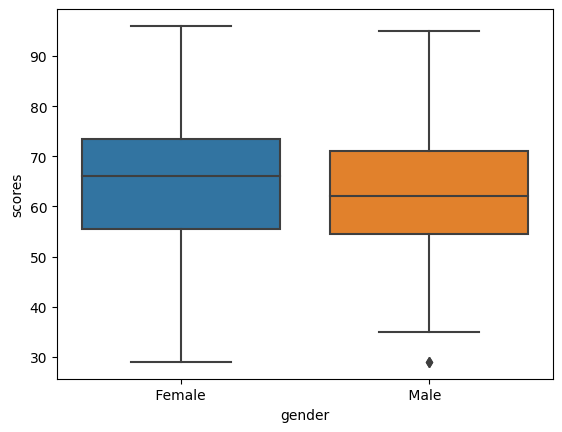

In [26]:

sns.boxplot(data=bp,x='gender',y='scores')

In [27]:
vals=['english', 'economics','psychology']


In [28]:
vals+['student_id', 'full_name', 'gender', 'class']

['english',
 'economics',
 'psychology',
 'student_id',
 'full_name',
 'gender',
 'class']

In [29]:
bp2=df[['student_id','class']+vals].melt(  id_vars=['student_id','class'],
        value_vars=vals,value_name='scores',var_name='subject')


In [30]:
bp2['class']=bp2['class'].str.strip()

In [31]:
bp2=bp2.sort_values(by='class')

<Axes: xlabel='class', ylabel='scores'>

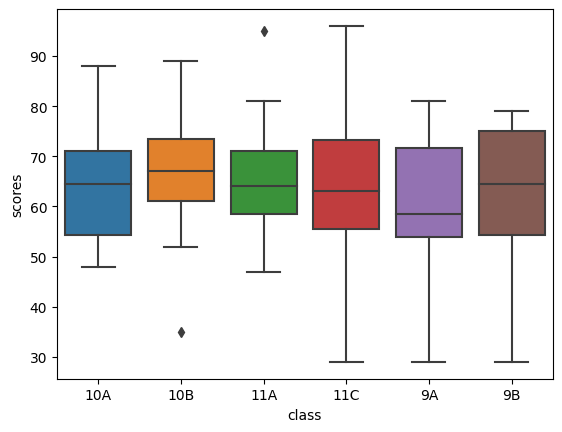

In [32]:
sns.boxplot(bp2,x='class',y='scores')

In [33]:
df.groupby('class').mean(numeric_only=True).mean(axis=1).sort_values()

class
 9B        50.225
 10A       51.950
 11C       53.425
 9A        55.525
 11A       59.750
 10B       60.700
dtype: float64